In [60]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.impute import SimpleImputer
import time
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Part 1. Data reading

In [21]:
data = pd.read_csv("../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [22]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Part 2. Categorical data EDA

General categorical variables info

In [23]:
categorical_variables = list( set(data.columns) - set(["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]) )
print(categorical_variables)
print(f"Number of categorical variables: {len(categorical_variables)}")

['KidneyDisease', 'Race', 'Smoking', 'AlcoholDrinking', 'SkinCancer', 'DiffWalking', 'PhysicalActivity', 'HeartDisease', 'Stroke', 'Asthma', 'Diabetic', 'Sex', 'AgeCategory', 'GenHealth']
Number of categorical variables: 14


In [24]:
for cat_var in categorical_variables:
    print(f"{cat_var}: {len(data[cat_var].unique())} unique values")

KidneyDisease: 2 unique values
Race: 6 unique values
Smoking: 2 unique values
AlcoholDrinking: 2 unique values
SkinCancer: 2 unique values
DiffWalking: 2 unique values
PhysicalActivity: 2 unique values
HeartDisease: 2 unique values
Stroke: 2 unique values
Asthma: 2 unique values
Diabetic: 4 unique values
Sex: 2 unique values
AgeCategory: 13 unique values
GenHealth: 5 unique values


**Visualization**

In [25]:
cat_var

'GenHealth'

In [26]:
data[cat_var]

0         Very good
1         Very good
2              Fair
3              Good
4         Very good
            ...    
319790         Fair
319791    Very good
319792         Good
319793         Good
319794         Good
Name: GenHealth, Length: 319795, dtype: object

In [27]:
for i in categorical_variables:
  print(i,type(i))

KidneyDisease <class 'str'>
Race <class 'str'>
Smoking <class 'str'>
AlcoholDrinking <class 'str'>
SkinCancer <class 'str'>
DiffWalking <class 'str'>
PhysicalActivity <class 'str'>
HeartDisease <class 'str'>
Stroke <class 'str'>
Asthma <class 'str'>
Diabetic <class 'str'>
Sex <class 'str'>
AgeCategory <class 'str'>
GenHealth <class 'str'>


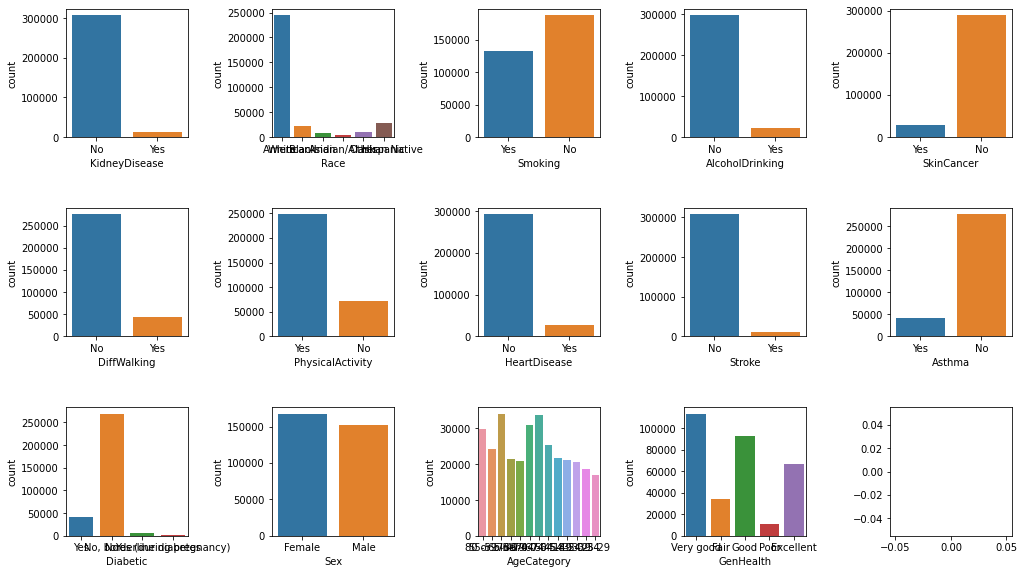

In [28]:
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(15, 9)
fig.tight_layout(pad=5)
k = 0

for cat_var in categorical_variables:    
    k = int( categorical_variables.index(cat_var)/5 )
    sns.countplot(data[cat_var], ax=axes[k, categorical_variables.index(cat_var)%5])

plt.plot()
plt.show()

**Correlation analysis**

Data encoding.

In [29]:
data["Diabetic"].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [30]:
data["Diabetic"] = data["Diabetic"].replace(
    {
        "Yes" : 3,
        "Yes (during pregnancy)" : 2,
        "No, borderline diabetes" : 1,
        "No" : 1
    }
)

In [31]:
data["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [32]:
data["GenHealth"] = data["GenHealth"].replace(
    {
        'Excellent' : 4,
        'Very good' : 3,
        'Good' : 2,
        'Fair' : 1,
        'Poor' : 0
    }
)

In [33]:
unencoded_cat_var = list(set(categorical_variables) - set(["Diabetic", "GenHealth"]))
data[unencoded_cat_var].head()

,KidneyDisease,Race,Smoking,AlcoholDrinking,SkinCancer,DiffWalking,PhysicalActivity,HeartDisease,Stroke,Asthma,Sex,AgeCategory
0,No,White,Yes,No,Yes,No,Yes,No,No,Yes,Female,55-59
1,No,White,No,No,No,No,Yes,No,Yes,No,Female,80 or older
2,No,White,Yes,No,No,No,Yes,No,No,Yes,Male,65-69
3,No,White,No,No,Yes,No,No,No,No,No,Female,75-79
4,No,White,No,No,No,Yes,Yes,No,No,No,Female,40-44


In [34]:
# cat_var_bin_encoding = list(set(unencoded_cat_var)-set(["AgeCategory", "Race"]))
for cat_var in list(set(unencoded_cat_var)-set(["AgeCategory", "Race"])):
    if cat_var=="Sex":
        data[cat_var] = data[cat_var].replace({"Male" : 1, "Female" : 0})
    else:
        data[cat_var] = data[cat_var].replace({"Yes" : 1, "No" : 0})
data[list(set(unencoded_cat_var)-set(["AgeCategory", "Race"]))].head()

,KidneyDisease,Smoking,AlcoholDrinking,SkinCancer,DiffWalking,PhysicalActivity,HeartDisease,Stroke,Asthma,Sex
0,0,1,0,1,0,1,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,1,0,0,1,1
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0


In [35]:
for cat_var in ["AgeCategory", "Race"]:
    data[cat_var] = data[cat_var].replace(dict([ (i, data[cat_var].unique().tolist().index(i)) for i in data[cat_var].unique() ]))
data[["AgeCategory", "Race"]]

,AgeCategory,Race
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
319790,6,5
319791,10,5
319792,8,5
319793,12,5


In [44]:
encd_cat = data[categorical_variables]
encd_cat.head()

,KidneyDisease,Race,Smoking,AlcoholDrinking,SkinCancer,DiffWalking,PhysicalActivity,HeartDisease,Stroke,Asthma,Diabetic,Sex,AgeCategory,GenHealth
0,0,0,1,0,1,0,1,0,0,1,3,0,0,3
1,0,0,0,0,0,0,1,0,1,0,1,0,1,3
2,0,0,1,0,0,0,1,0,0,1,3,1,2,1
3,0,0,0,0,1,0,0,0,0,0,1,0,3,2
4,0,0,0,0,0,1,1,0,0,0,1,0,4,3


In [45]:
corr_matrix_data_pack = [[data[i].corr(data[j]) if i!=j else 1 for j in categorical_variables] for i in categorical_variables]

<AxesSubplot:>

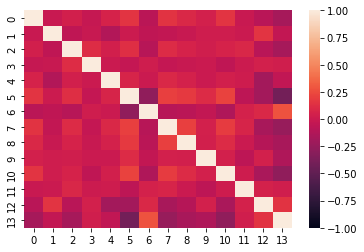

In [46]:
sns.heatmap(corr_matrix_data_pack, vmin=-1, vmax=1)

Correlation matrix shows categorical parameters are bad-correlated.

# Part 3. Numerical data EDA

**General info**

In [39]:
numerical_variables = list( set(data.columns) - set(categorical_variables) )
print(numerical_variables)
print(f"Numerical variables number: {len(numerical_variables)}")

['MentalHealth', 'BMI', 'SleepTime', 'PhysicalHealth']
Numerical variables number: 4


**Visualization**

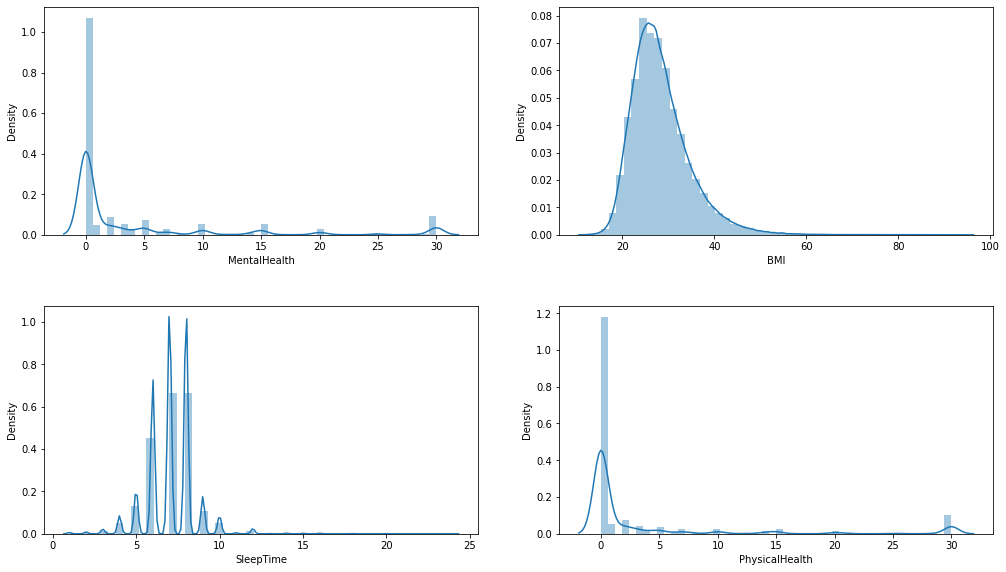

In [40]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15, 9)
fig.tight_layout(pad=5)
k = 0

for num_var in numerical_variables:
    k = int(numerical_variables.index(num_var)/2)
    sns.distplot(data[num_var], ax=axes[k, numerical_variables.index(num_var)%2])

plt.plot()
plt.show()

**Correlation analysis**

In [41]:
corr_matrix_data_pack = [[data[i].corr(data[j]) if i!=j else 1 for j in numerical_variables] for i in numerical_variables]

<AxesSubplot:>

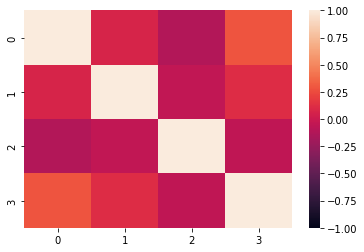

In [42]:
sns.heatmap(corr_matrix_data_pack, vmin=-1, vmax=1)

In [43]:
num = pd.DataFrame(data[numerical_variables])
num

,MentalHealth,BMI,SleepTime,PhysicalHealth
0,30.0,16.60,5.0,3.0
1,0.0,20.34,7.0,0.0
2,30.0,26.58,8.0,20.0
3,0.0,24.21,6.0,0.0
4,0.0,23.71,8.0,28.0
...,...,...,...,...
319790,0.0,27.41,6.0,7.0
319791,0.0,29.84,5.0,0.0
319792,0.0,24.24,6.0,0.0
319793,0.0,32.81,12.0,0.0


In [50]:
data1 = pd.concat([encd_cat,num], axis=1)

In [53]:
data1.columns.value_counts()

KidneyDisease       1
Race                1
SleepTime           1
BMI                 1
MentalHealth        1
GenHealth           1
AgeCategory         1
Sex                 1
Diabetic            1
Asthma              1
Stroke              1
HeartDisease        1
PhysicalActivity    1
DiffWalking         1
SkinCancer          1
AlcoholDrinking     1
Smoking             1
PhysicalHealth      1
dtype: int64

In [55]:
data1

,KidneyDisease,Race,Smoking,AlcoholDrinking,SkinCancer,DiffWalking,PhysicalActivity,HeartDisease,Stroke,Asthma,Diabetic,Sex,AgeCategory,GenHealth,MentalHealth,BMI,SleepTime,PhysicalHealth
0,0,0,1,0,1,0,1,0,0,1,3,0,0,3,30.0,16.60,5.0,3.0
1,0,0,0,0,0,0,1,0,1,0,1,0,1,3,0.0,20.34,7.0,0.0
2,0,0,1,0,0,0,1,0,0,1,3,1,2,1,30.0,26.58,8.0,20.0
3,0,0,0,0,1,0,0,0,0,0,1,0,3,2,0.0,24.21,6.0,0.0
4,0,0,0,0,0,1,1,0,0,0,1,0,4,3,0.0,23.71,8.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0,5,1,0,0,1,0,1,0,1,3,1,6,1,0.0,27.41,6.0,7.0
319791,0,5,1,0,0,0,1,0,0,1,1,1,10,3,0.0,29.84,5.0,0.0
319792,0,5,0,0,0,0,1,0,0,0,1,0,8,2,0.0,24.24,6.0,0.0
319793,0,5,0,0,0,0,0,0,0,0,1,0,12,2,0.0,32.81,12.0,0.0


In [56]:
data1.isna().sum()

KidneyDisease       0
Race                0
Smoking             0
AlcoholDrinking     0
SkinCancer          0
DiffWalking         0
PhysicalActivity    0
HeartDisease        0
Stroke              0
Asthma              0
Diabetic            0
Sex                 0
AgeCategory         0
GenHealth           0
MentalHealth        0
BMI                 0
SleepTime           0
PhysicalHealth      0
dtype: int64

# Extracting X and y

In [57]:
X = data1.drop(['HeartDisease'], 1)
y = data1.HeartDisease

# Splitting into train and test

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Building Models

## KNN MODEL

In [62]:
knn = KNeighborsClassifier(n_neighbors=6)
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
knn_ypred = knn.predict(X_test)
prediction_end = time.perf_counter()
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Time consumed for training: 0.043 seconds
Time consumed for prediction: 524.99330 seconds


In [63]:
acc_knn = accuracy_score(y_test,knn_ypred)
acc_knn

0.9125038696423043

In [64]:
f1_score(y_test,knn_ypred)

0.061197785606441873

In [65]:
print(classification_report(y_test,knn_ypred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     97508
           1       0.36      0.03      0.06      9091

    accuracy                           0.91    106599
   macro avg       0.64      0.51      0.51    106599
weighted avg       0.87      0.91      0.88    106599



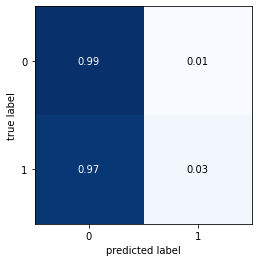

In [66]:
conf_mat = confusion_matrix(y_test, knn_ypred)

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                figsize=(6, 4))
fig.show()

## LOGISTIC REGRESSION

In [67]:
lor = LogisticRegression(max_iter=1000)
training_start = time.perf_counter()
lor.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
lor_ypred = lor.predict(X_test)
prediction_end = time.perf_counter()
lor_train_time = training_end-training_start
lor_prediction_time = prediction_end-prediction_start
print("Time consumed for training: %4.3f seconds" % (lor_train_time))
print("Time consumed for prediction: %6.5f seconds" % (lor_prediction_time))

Time consumed for training: 10.882 seconds
Time consumed for prediction: 0.01723 seconds


In [68]:
acc_lor = accuracy_score(y_test,lor_ypred)
acc_lor

0.9158341072617942

In [69]:
f1_score(y_test,lor_ypred)

0.16771799628942485

In [70]:
print(classification_report(y_test,lor_ypred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     97508
           1       0.54      0.10      0.17      9091

    accuracy                           0.92    106599
   macro avg       0.73      0.55      0.56    106599
weighted avg       0.89      0.92      0.89    106599



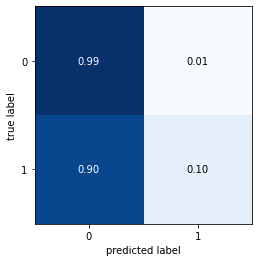

In [71]:
conf_mat = confusion_matrix(y_test, lor_ypred)

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                figsize=(6, 4))
fig.show()

## GAUSSIAN-NB MODEL

In [72]:
gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
gnb_ypred = gnb.predict(X_test)
prediction_end = time.perf_counter()
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Time consumed for training: 0.140 seconds
Time consumed for prediction: 0.04533 seconds


In [73]:
acc_gnb = accuracy_score(y_test,gnb_ypred)
acc_gnb

0.8428409272132009

In [74]:
f1_score(y_test,gnb_ypred)

0.33962710394576057

In [75]:
print(classification_report(y_test,gnb_ypred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     97508
           1       0.26      0.47      0.34      9091

    accuracy                           0.84    106599
   macro avg       0.61      0.68      0.63    106599
weighted avg       0.89      0.84      0.86    106599



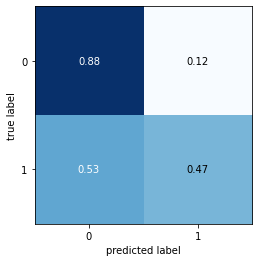

In [76]:
conf_mat = confusion_matrix(y_test, gnb_ypred)

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                figsize=(6, 4))
fig.show()

## XG-Boost MODEL

In [77]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100,random_state=5)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
xgb_ypred = xgb.predict(X_test)
prediction_end = time.perf_counter()
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

Time consumed for training: 15.078
Time consumed for prediction: 0.12588 seconds


In [78]:
acc_xgb = accuracy_score(y_test,xgb_ypred)
acc_xgb

0.9168097261700391

In [79]:
f1_score(y_test,xgb_ypred)

0.15446224256292906

In [80]:
print(classification_report(y_test,xgb_ypred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     97508
           1       0.58      0.09      0.15      9091

    accuracy                           0.92    106599
   macro avg       0.75      0.54      0.56    106599
weighted avg       0.89      0.92      0.89    106599



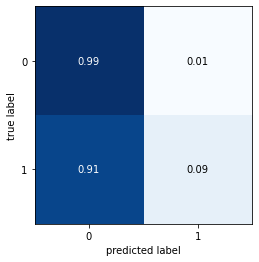

In [81]:
conf_mat = confusion_matrix(y_test, xgb_ypred)

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                figsize=(6, 4))
fig.show()

## RANDOM FOREST MODEL

In [82]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=10,random_state=100,criterion='gini')
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
rfc_ypred = rfc.predict(X_test)
prediction_end = time.perf_counter()
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Time consumed for training: 12.936 seconds
Time consumed for prediction: 0.70163 seconds


In [83]:
acc_rfc = accuracy_score(y_test,xgb_ypred)
acc_rfc

0.9168097261700391

In [84]:
f1_score(y_test,rfc_ypred)

0.08388883191467542

In [85]:
print(classification_report(y_test,xgb_ypred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     97508
           1       0.58      0.09      0.15      9091

    accuracy                           0.92    106599
   macro avg       0.75      0.54      0.56    106599
weighted avg       0.89      0.92      0.89    106599



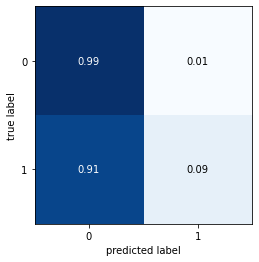

In [86]:
conf_mat = confusion_matrix(y_test, xgb_ypred)

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                figsize=(6, 4))
fig.show()

## COMPARE ALL MODEL

In [87]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'XGBoost', 'Random Forest'],
    'Score': [acc_knn, acc_lor, acc_gnb, acc_xgb, acc_rfc]})
   
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
XGBoost,0.916810
Random Forest,0.916810
Logistic Regression,0.915834
KNN,0.912504
Naive Bayes,0.842841
